# Test Campaign Planning Template
Planning for a standard DVS test campaign.

                                                              As on 27/06/2024

In [1]:
%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import katpoint
from dvs import planning, cattools

INFO: Orion A (thermal) flux model fitted coefficients: [ 398.80529653 -437.57217069]
INFO: Orion A (power law) flux model fitted coefficients: [-0.84961654  1.87011783 -0.24937387]


/home/aph/work/dvs/libraries/systemsanalysis/katsemodels.py:1143: RuntimeWarning: divide by zero encountered in divide
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.
/home/aph/work/dvs/libraries/systemsanalysis/katsemodels.py:1143: RuntimeWarning: invalid value encountered in multiply
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.


In [3]:
## Some available catalogues:
!ls ../catalogues

arrays		rfi_mask.txt	 targets_pnt_Ku.csv  targets_pnt_S.csv
fluxmodels.csv	sources_all.csv  targets_pnt_L.csv


## Planning

In [4]:
# The calendar days to run the assessment for
days = ["2024-07-01"] # YYYY-MM-DD can be used for katpoint.Timestamp & np.datetime64
day_startend = ["00:00:00", "23:59:59"] # UTC times to start & stop each day's assessment

def mkTobs(day_no):
    day = days[day_no]
    # Alternative for specifying a time in UTC: np.datetime64(f"{day}T{_}").astype(float)
    return [katpoint.Timestamp(f"{day} {_}").secs for _ in day_startend]  # Start & stop, in UTC seconds

In [5]:
# Pick the day
Tobs = mkTobs(0)

Using  ../catalogues/sources_all.csv
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'J0833-4543' body=radec at 0x7ff43bf99520>
 <katpoint.Target 'J0835-4510' body=radec at 0x7ff43bf99580>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'J0833-4543' body=radec at 0x7ff43bf99520>
 <katpoint.Target 'J0835-4510' body=radec at 0x7ff43bf99580>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'J0833-4543' body=radec at 0x7ff43bf99520>
 <katpoint.Target 'J0835-4510' body=radec at 0x7ff43bf99580>]
  # Planning drops the following due to being within 1 deg away from other targets:
[<katpoint.Target 'J0833-4543' body=radec at 0x7ff43bf99520>
 <katpoint.Target 'J0835-4510' body=radec at 0x7ff43bf99580>]


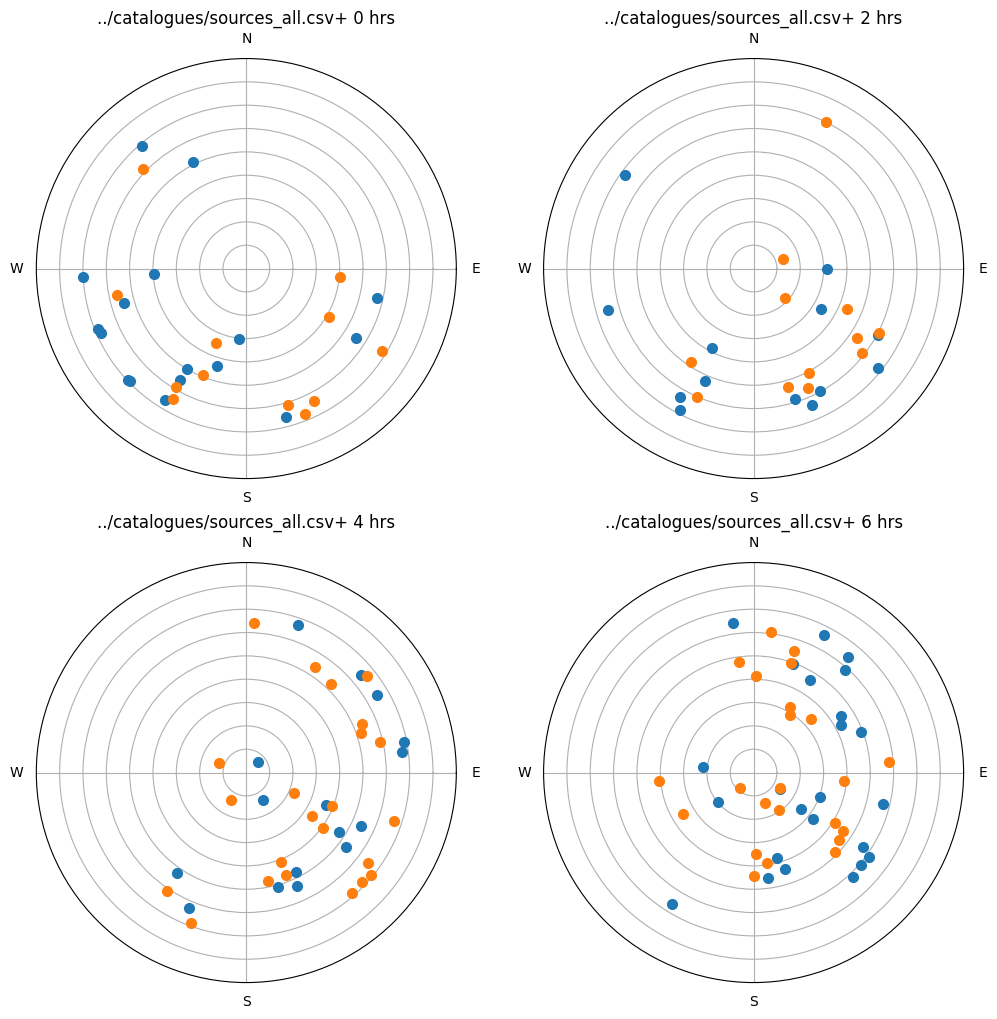

In [7]:
# Plan for pointing measurements
# See which session will get better sky coverage using this catalogue:
planning.sim_pointingmeasurements("../catalogues/sources_all.csv", Tstart=Tobs[0], Hr=2, S=4, verbose=False)

          Name |           Rise UTC |            Set UTC | Max Rate [deg/sec@1GHz]
--------------------------------------------------------------------------------
           Sun |  2024/7/1 07:29:32 |  2024/7/2 13:47:31 | 80.5
    J0534+2200 |  2024/7/1 06:19:08 |  2024/7/2 12:37:54 | 81.3
    J0535-0523 |  2024/7/1 04:52:08 |  2024/7/2 14:05:52 | 87.3
    J0918-1205 |  2024/7/1 08:18:39 |  2024/7/2 18:03:42 | 85.7
    J1651+0459 |  2024/7/1 16:32:53 |  2024/7/2 00:57:09 | 87.5
    J0519-4546 |  2024/7/1 03:06:57 |  2024/7/2 15:19:13 | -61.2
    J1230+1223 |  2024/7/1 12:35:45 |  2024/7/2 20:11:11 | 85.9
    J1939-6342 |  2024/7/1 16:24:30 |  2024/7/2 06:43:20 | -39.1
    J0408-6545 |  2024/7/1 00:42:50 |  2024/7/2 15:19:42 | 36.1


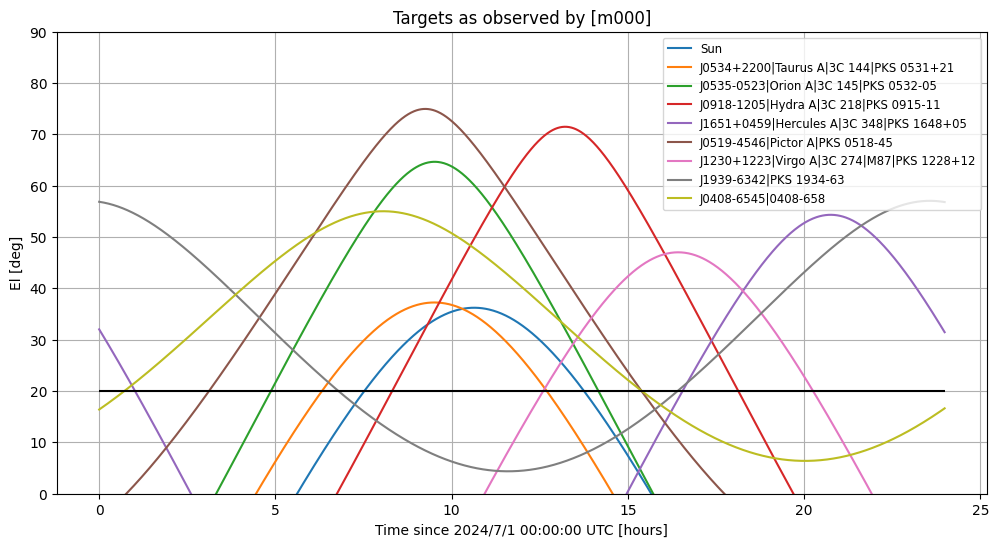

In [8]:
# Plan for drift scans
planning.describe_target("Sun|Taurus A|Orion A|Hydra A|Hercules A|Pictor A|Virgo A|PKS 1934-63|J0408-6545",
                catfn="../catalogues/fluxmodels.csv", horizon_deg=20, date=Tobs[0], end_date=Tobs[-1],
                catant="m000, -30.713, 21.444, 1050.0", figsize=(12,6));

Targets visible from antenna 'A0' at 2024-07-01 13:59:59.500 SAST, with flux density (Jy) evaluated at 1400 MHz

Target                        Azimuth    Elevation <    Flux Fringe period
------                        -------    --------- -    ---- -------------
Zenith                      0:00:00.0   90:00:00.0 -        
J0752-2625                -33:51:11.7   84:57:35.4 \    11.9
J0824-4259                164:17:17.3   77:04:13.3 /    18.2
J0835-4510                159:59:37.6   74:17:46.5 /        
J0833-4543                161:52:06.1   73:55:09.7 /   238.2
J0859-4345                144:28:51.1   73:01:39.2 /   396.5
J0859-4731                152:20:23.4   70:10:44.3 /   284.3
J0918-1205                 46:27:48.6   64:54:05.3 /        
J0924-5159                151:28:18.1   64:08:07.1 /    30.0
J0627-0553                -47:39:14.5   56:14:18.7 \        
J0522-3627               -110:46:01.1   56:00:21.1 \        
J0519-4546               -127:04:28.7   54:42:20.5 \    66.6
J0440

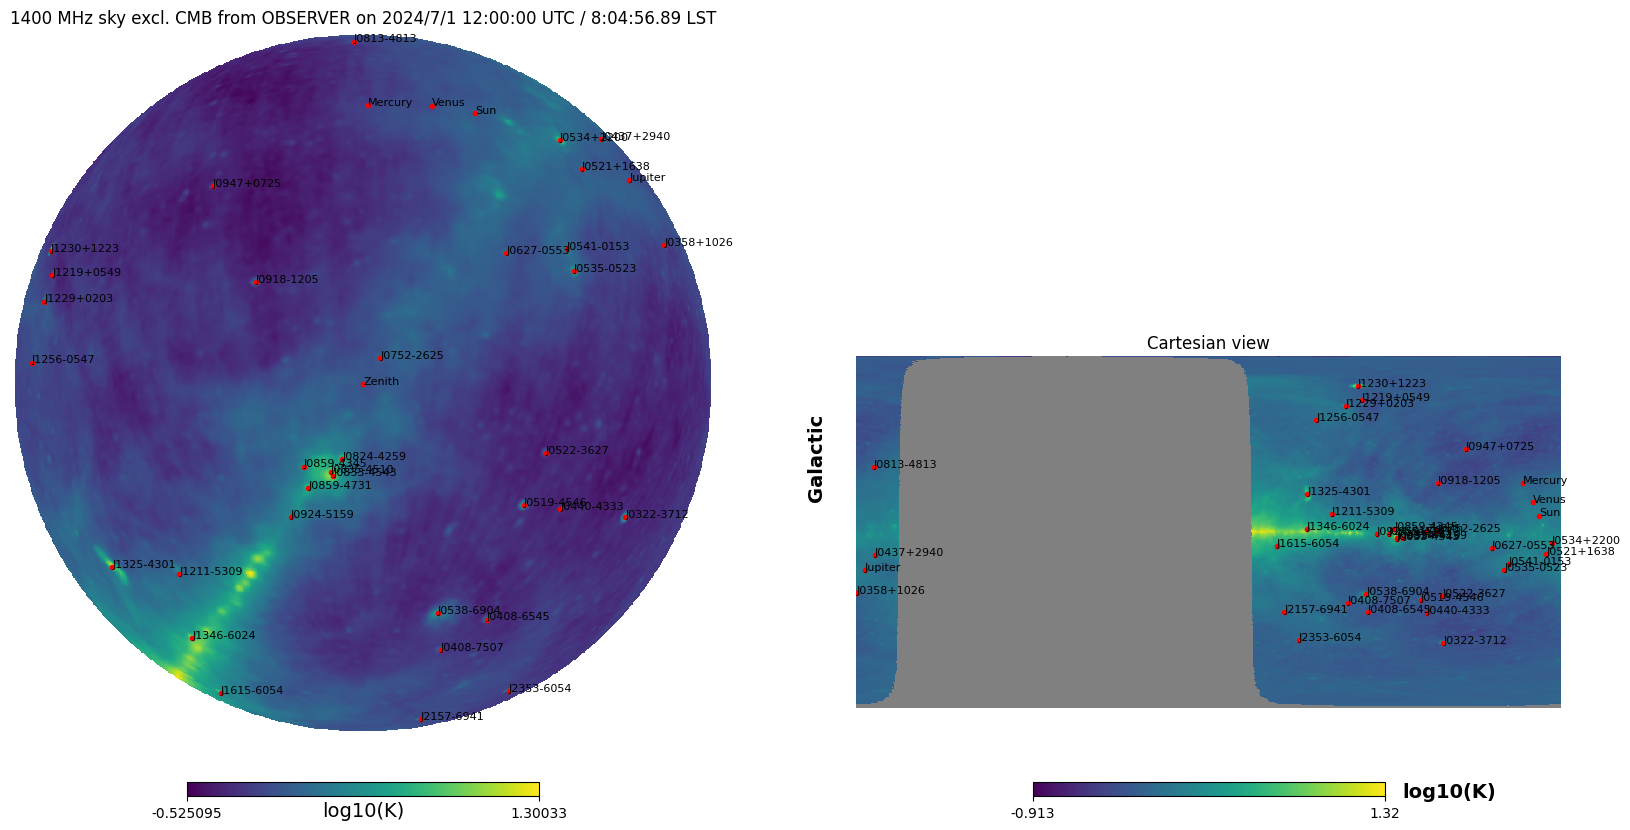

In [9]:
# See what else is up during the middle of the day
cat = planning.radiosky(np.mean(Tobs), f_MHz=1400, catfn="../catalogues/sources_all.csv", el_limit_deg=10)

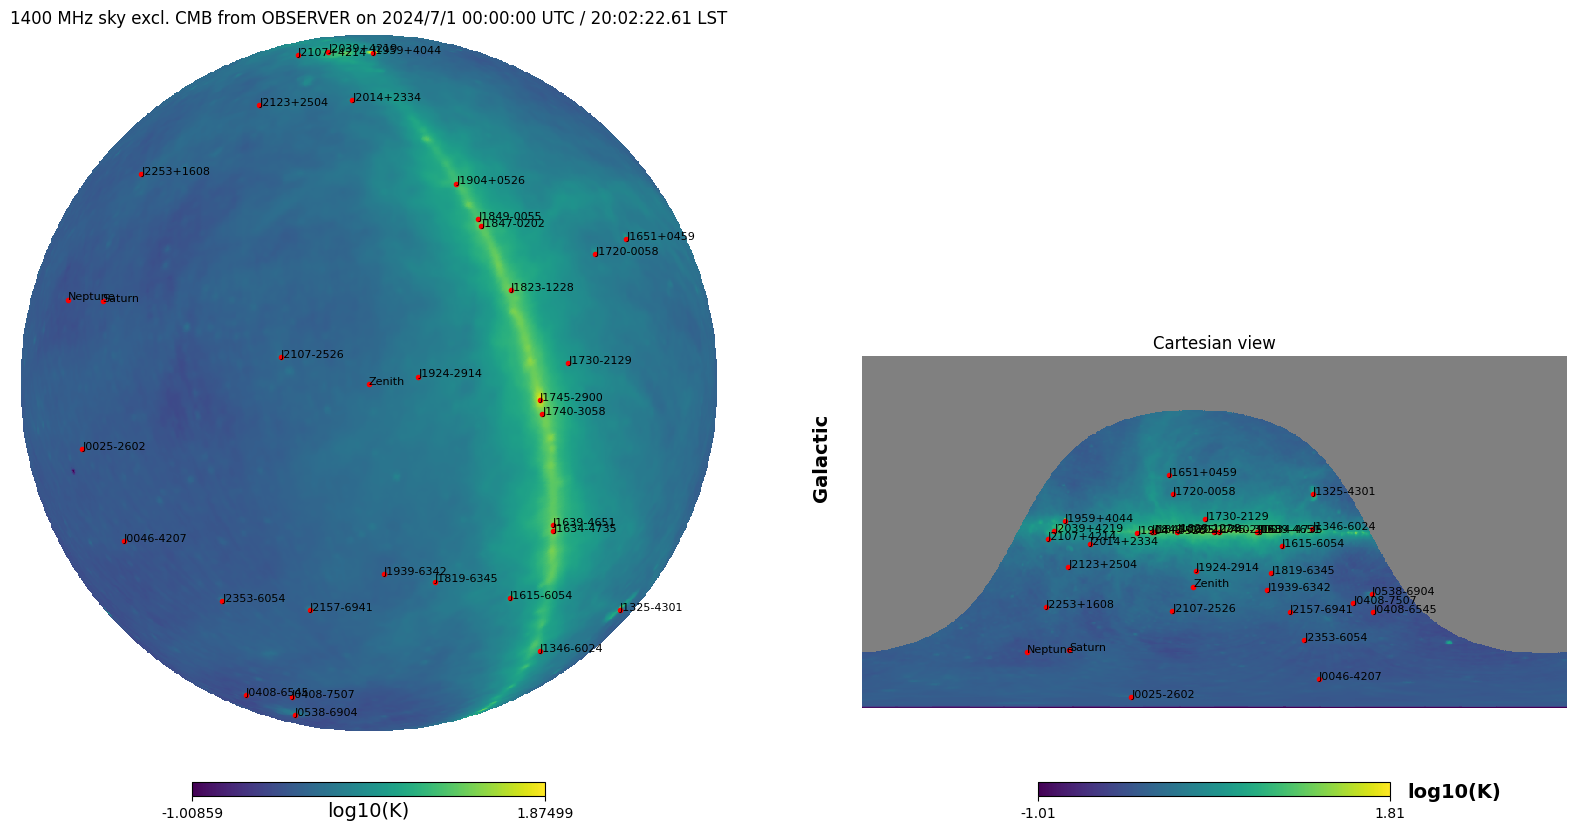

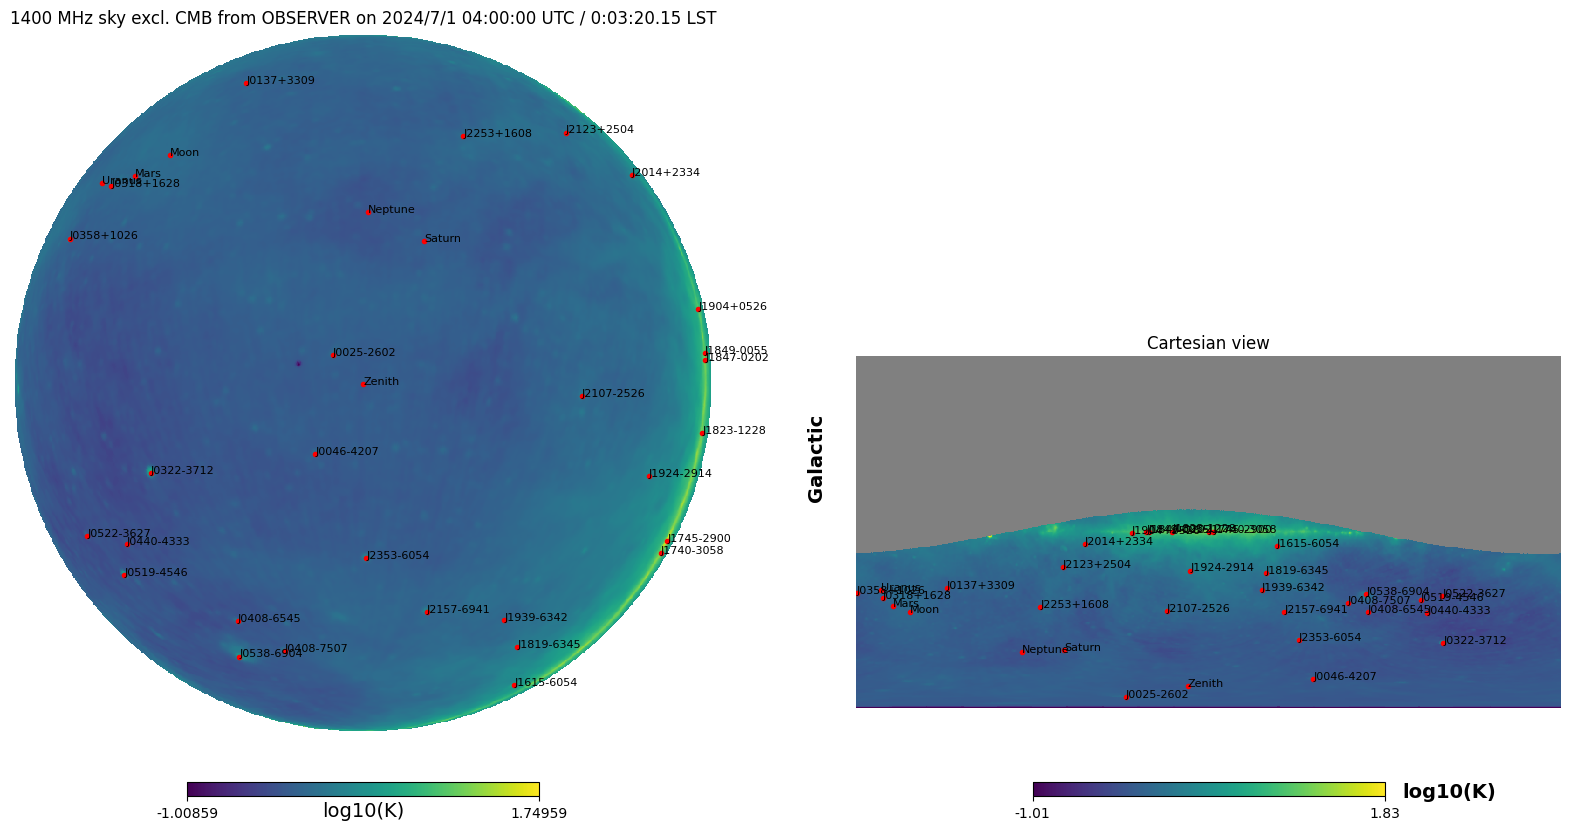

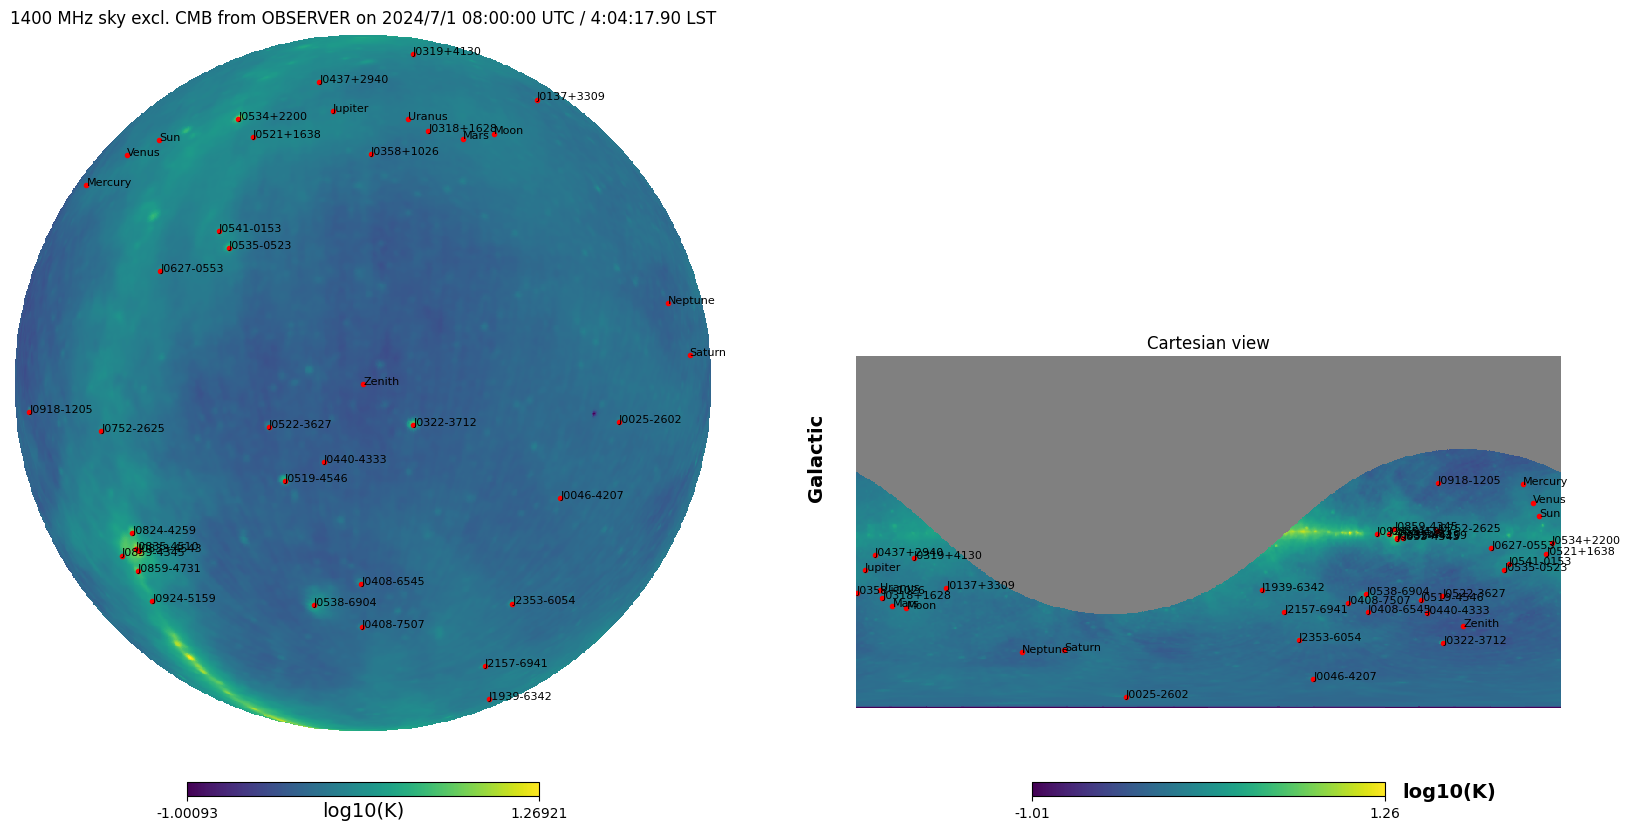

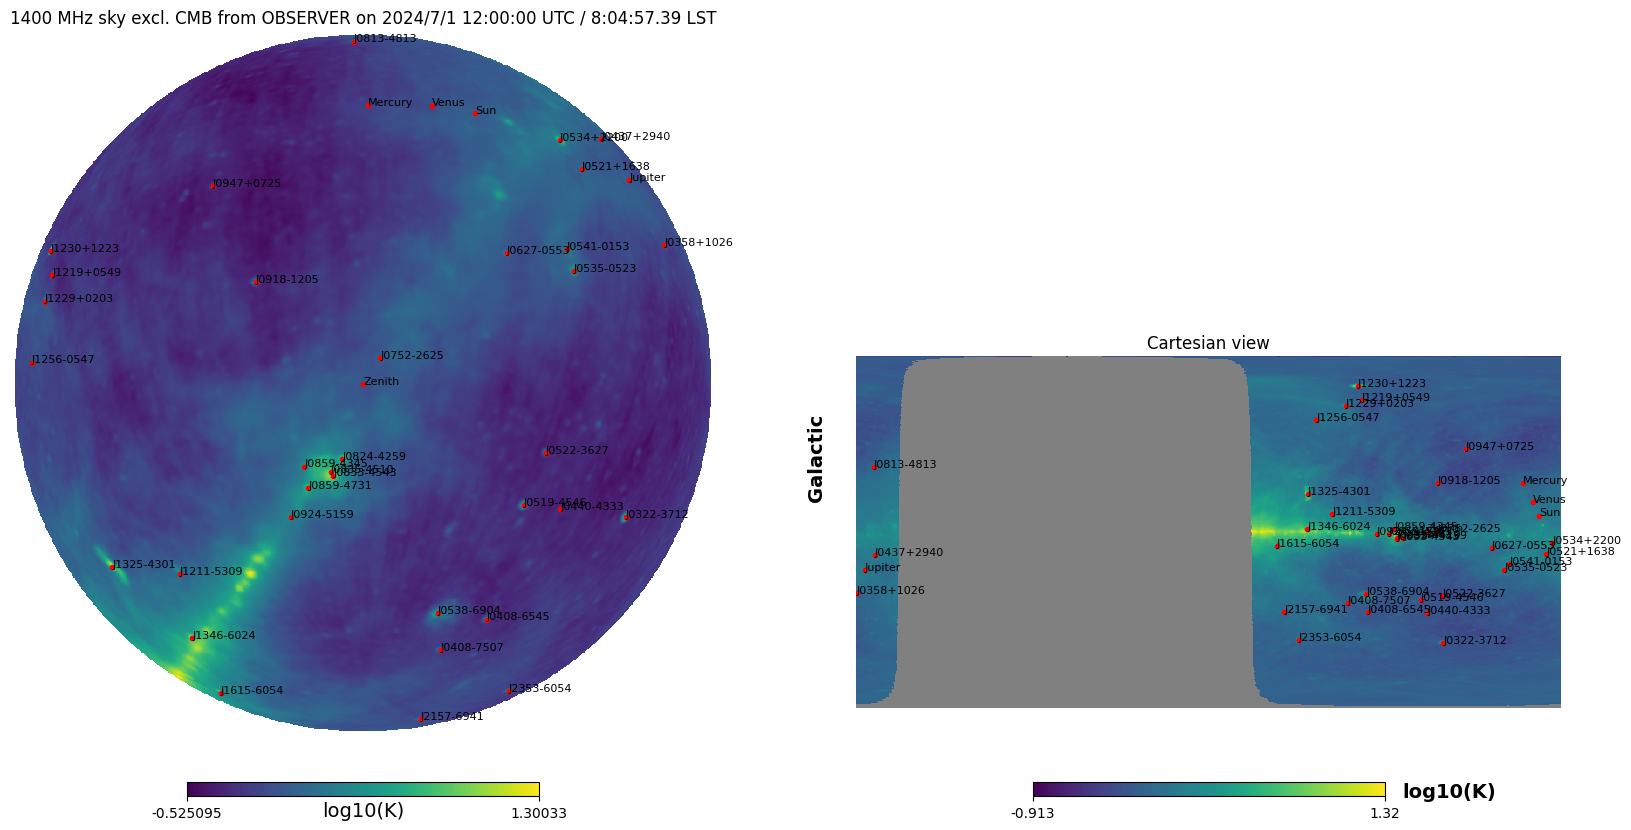

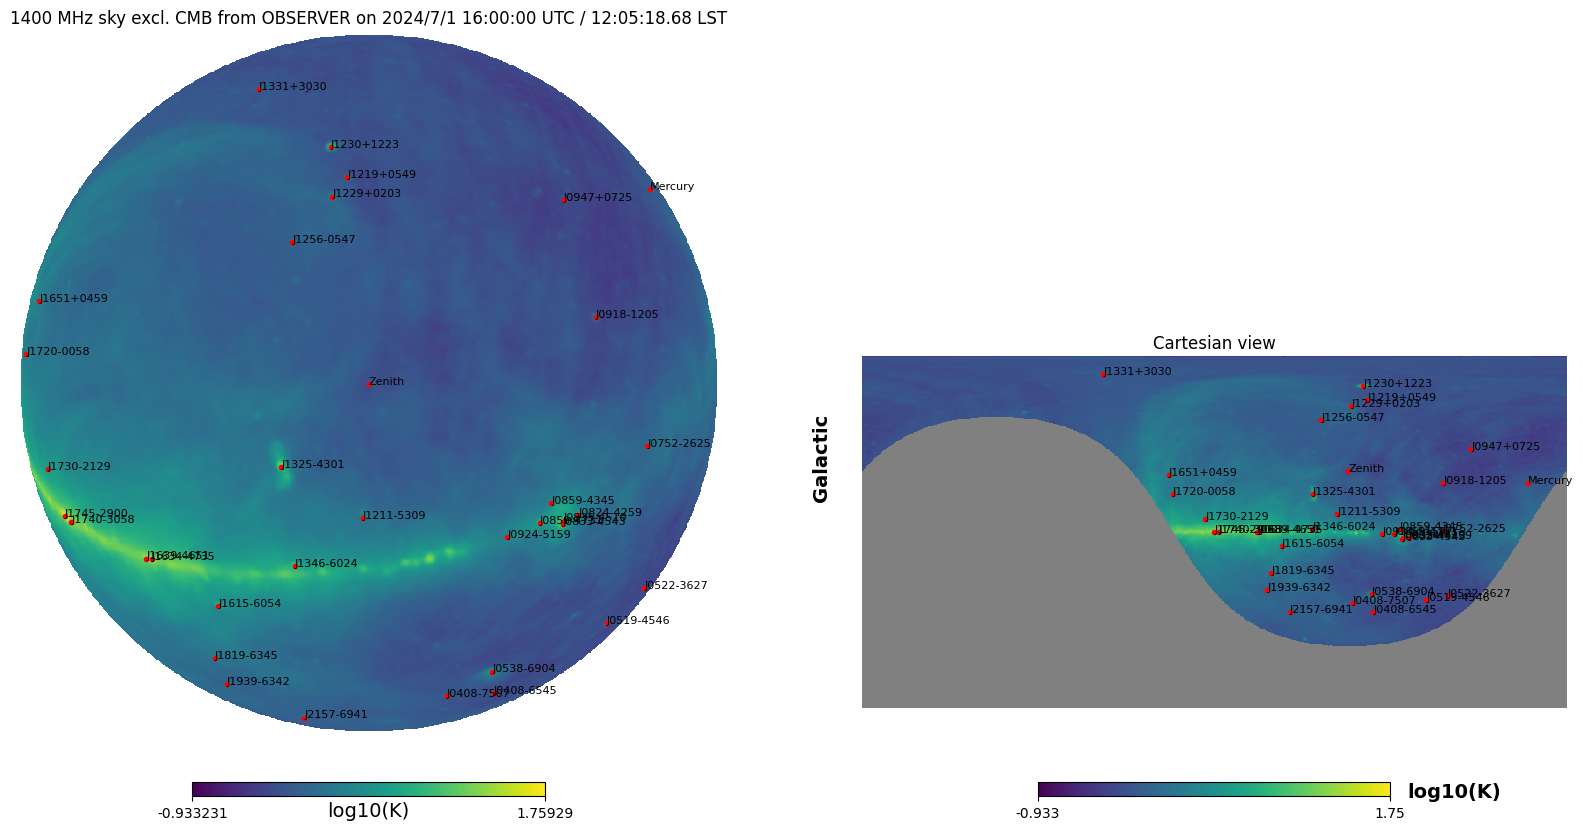

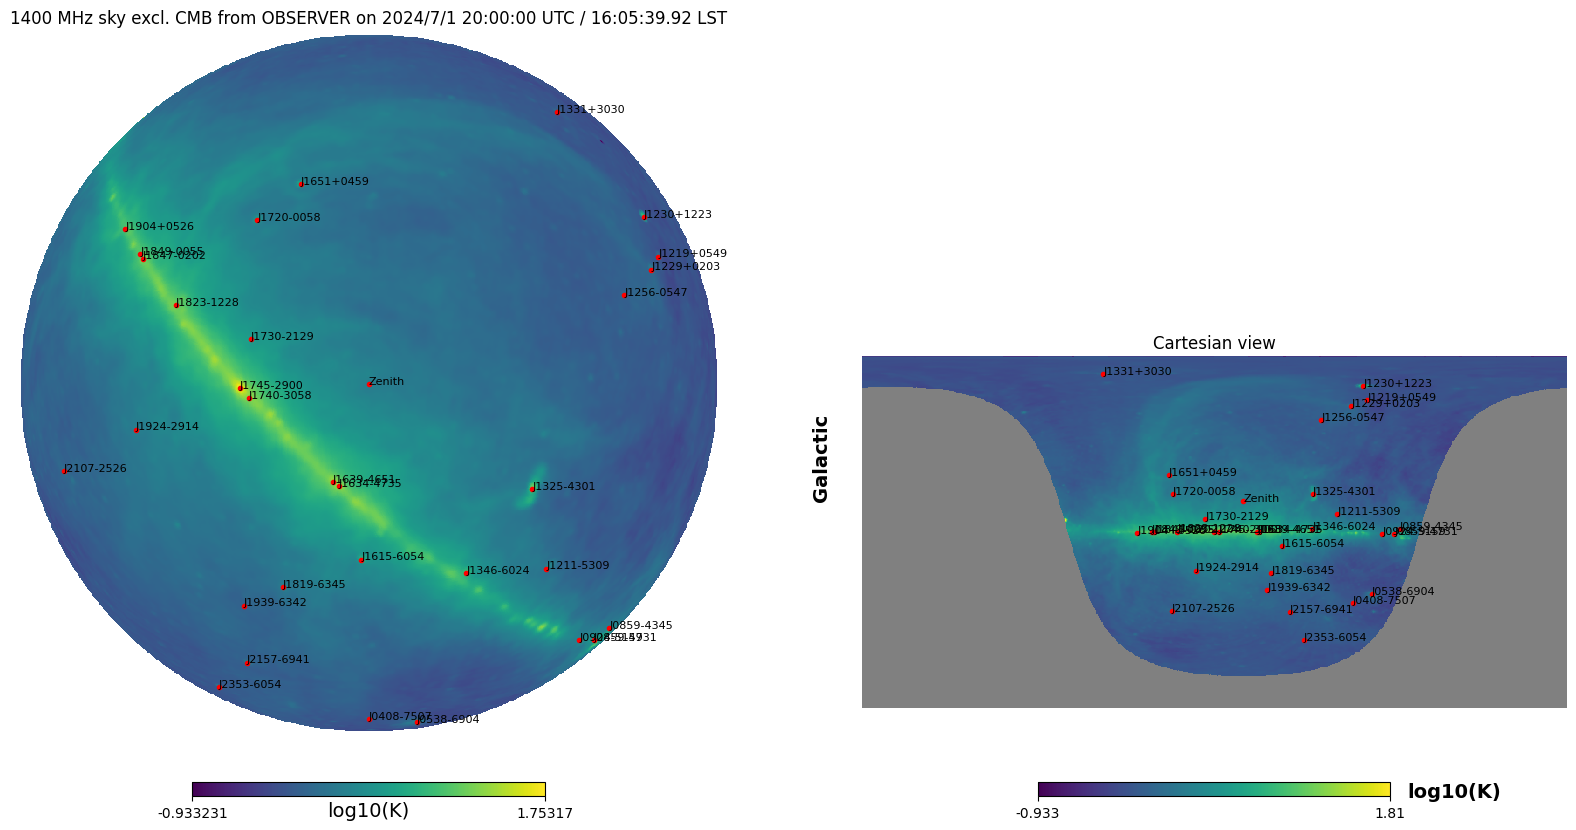

In [10]:
# Plan for tip curve measurements
# Pick a time of day and an azimuth angle that doesn't cross the galaxy or the Sun!

for T in np.arange(Tobs[0], Tobs[-1], 4*60*60): # Consider 4 hourly intervals
    planning.radiosky(T, f_MHz=1400, catfn="../catalogues/sources_all.csv", el_limit_deg=10, tabulate=False)